# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is a field of artificial intelligence and computer science that allows as getting information from images or videos such as identifying objects, face recognization, detecting motions, etc. 

In [38]:
# Import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
print(tf.__version__)

2.12.0


## Get the data

The images we are working on are from Food 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However this datasets modified it to only use two classes. This classes are pizza and steak.

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-05-24 12:29:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   227MB/s    in 0.5s    

2023-05-24 12:29:39 (227 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

A very important step at the beginning of the any machine learning project is understanding data or inspecting the data. For the computer vision this means visualizing many sample of data.

In [5]:
# List pizza_steak directory
!ls pizza_steak

test  train


In [8]:
# List train directory
!ls pizza_steak/train

pizza  steak


In [10]:
# List steak directory in the pizza directory
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

Woww. There are banch of images here.. And let's walk through pizza_steak directory and list number of files.

In [20]:
import os

# List number of files in pizza_steak
for dir in os.walk('pizza_steak'):
  print(f'There are {len(dir[1])} directories and {len(dir[2])} images in {dir[0]}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


Totally, there are 1500 images for training. 750 of them is steak and 750 of them is pizza. For the testing we have 500 images and 250 of them is for pizza and others for steak.

In [23]:
# Another way to find how many images are in a file
num_steak_images_train = os.listdir('pizza_steak/train/steak')

print(f'There are {len(num_steak_images_train)} steak images for training.')

There are 750 steak images for training.


To visualize the images, first let's get the class names programmatically.

In [40]:
# Get the classnames programmatically
import pathlib

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class names based on subdirectories
print(class_names)

['pizza' 'steak']


In [63]:
# Visualize the images
def view_random_image(target_dir, target_classes):
  
  # Setup the target directory
  target_folder = target_dir + target_classes

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read and plot image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_classes)
  plt.axis('off')
  plt.show()

  # Show the shape of image
  print(f'Image shape: {img.shape}')

  return img

['1941807.jpg']


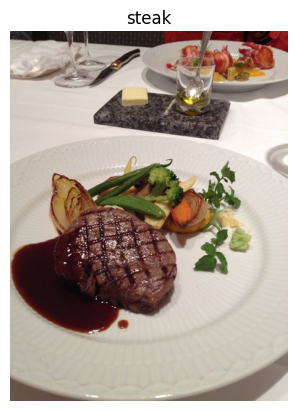

Image shape: (512, 384, 3)


In [64]:
# Let's visualize a random image in steak
random_steak = view_random_image('pizza_steak/train/', 'steak')

['2667244.jpg']


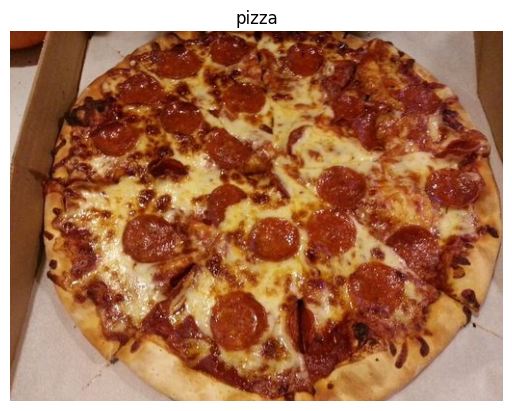

Image shape: (384, 512, 3)


In [72]:
# Let's visualize a random image in pizza
random_pizza = view_random_image('pizza_steak/train/', 'pizza')